   id_produto  id_voluntária  durabilidade  idade  exposicao_sol
0           1              1            12     40              1
1           2              2             5     36              0
2           1              3            19     47              0
3           1              4            14     36              1
4           1              5            17     46              1

Resultado ANOVA para durabilidade:
                df        sum_sq      mean_sq          F        PR(>F)
id_produto    1.0   8991.405000  8991.405000  99.929607  1.767665e-20
Residual    298.0  26813.261667    89.977388        NaN           NaN

Média de durabilidade para cada fórmula:
 id_produto
1    15.11
2     7.77
3    28.52
Name: durabilidade, dtype: float64

Resultado ANOVA para durabilidade com exposição ao sol e idade:
                   df        sum_sq      mean_sq           F        PR(>F)
id_produto       1.0   8991.405000  8991.405000  126.687379  1.058154e-24
exposicao_sol    1.0   3930

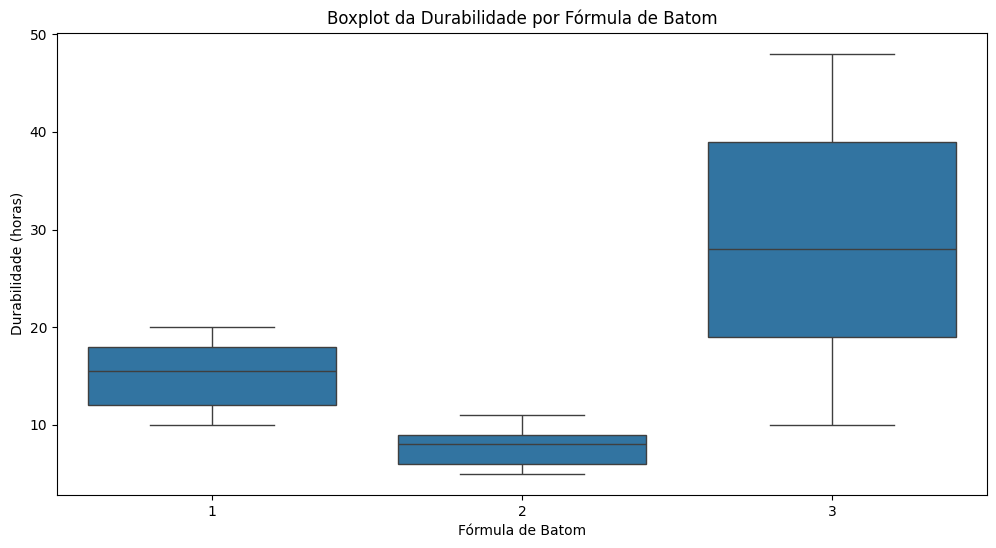

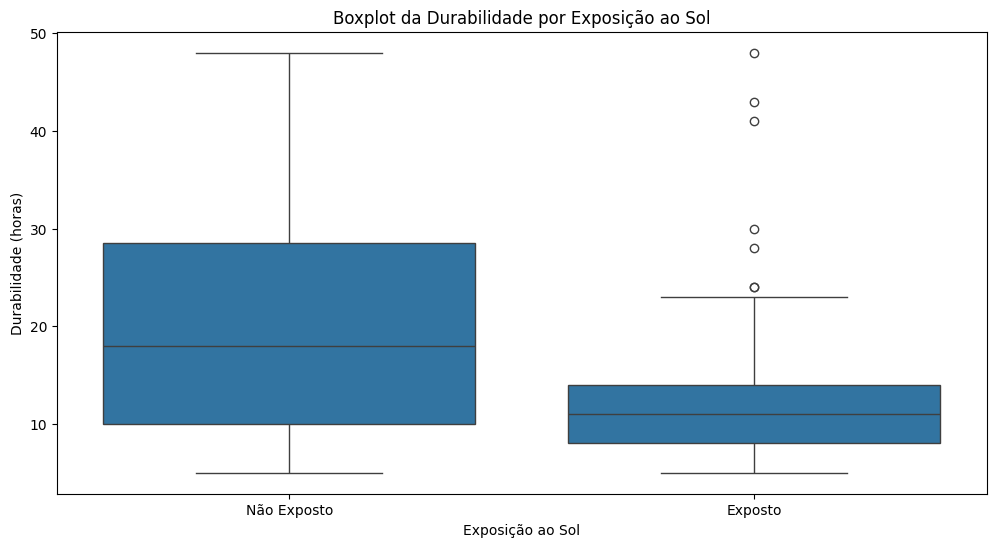

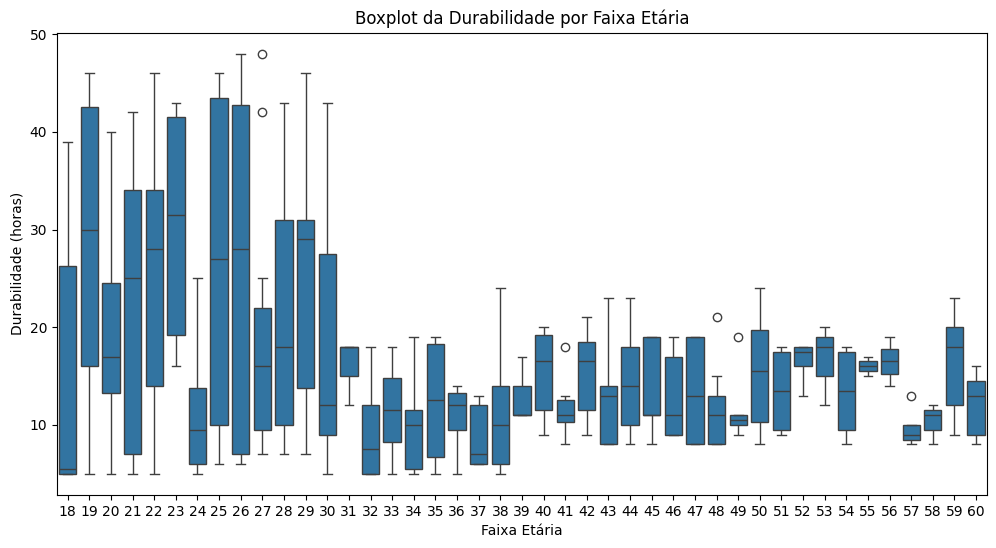

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Carregar os dados
df = pd.read_csv('/content/desafio_01_cosmeticos_challenge_testehipoteses230206120450-230911-094933.csv')

# Visualizar as primeiras linhas do dataframe
print(df.head())

# 1 - Teste ANOVA para verificar diferença na durabilidade entre as fórmulas
anova_durabilidade = ols('durabilidade ~ id_produto', data=df).fit()
anova_durabilidade_resultado = anova_lm(anova_durabilidade)
print("\nResultado ANOVA para durabilidade:\n", anova_durabilidade_resultado)

# Calcular média de durabilidade para cada fórmula
media_durabilidade = df.groupby('id_produto')['durabilidade'].mean()
print("\nMédia de durabilidade para cada fórmula:\n", media_durabilidade)

# 2 - Teste ANOVA para verificar se a diferença na durabilidade persiste com exposição ao sol e idade
modelo = ols('durabilidade ~ id_produto + exposicao_sol + idade', data=df).fit()
anova = anova_lm(modelo)
print("\nResultado ANOVA para durabilidade com exposição ao sol e idade:\n", anova)

# Calcular média de durabilidade para cada nível de exposição ao sol e idade
media_durabilidade_exposicao = df.groupby('exposicao_sol')['durabilidade'].mean()
media_durabilidade_idade = df.groupby('idade')['durabilidade'].mean()
print("\nMédia de durabilidade para cada nível de exposição ao sol:\n", media_durabilidade_exposicao)
print("\nMédia de durabilidade para cada faixa etária:\n", media_durabilidade_idade)

# 3 - Teste Tukey para comparações múltiplas entre as fórmulas
tukey_durabilidade = pairwise_tukeyhsd(endog=df['durabilidade'], groups=df['id_produto'], alpha=0.05)
print("\nTeste Tukey para durabilidade:\n", tukey_durabilidade)

# Recomendação com base nos resultados
# Verificar se existe diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes
if anova_durabilidade_resultado['PR(>F)'][0] < 0.05:
    print("\nHá diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.")
    print("Você pode considerar os resultados do Teste Tukey para determinar quais fórmulas diferem entre si.")

# Verificar se a diferença na durabilidade persiste com exposição ao sol e idade
if anova['PR(>F)']['idade'] < 0.05 or anova['PR(>F)']['exposicao_sol'] < 0.05:
    print("\nA diferença na durabilidade pode ser influenciada pela exposição ao sol ou idade.")
    print("Considere avaliar os resultados com mais detalhes para fazer uma recomendação precisa.")

# Recomendação com base no teste Tukey
print("\nRecomendação com base no teste Tukey:")
print(tukey_durabilidade)

# Visualização dos Dados
plt.figure(figsize=(12, 6))
sns.boxplot(x='id_produto', y='durabilidade', data=df)
plt.title('Boxplot da Durabilidade por Fórmula de Batom')
plt.xlabel('Fórmula de Batom')
plt.ylabel('Durabilidade (horas)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='exposicao_sol', y='durabilidade', data=df)
plt.title('Boxplot da Durabilidade por Exposição ao Sol')
plt.xlabel('Exposição ao Sol')
plt.ylabel('Durabilidade (horas)')
plt.xticks([0, 1], ['Não Exposto', 'Exposto'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='idade', y='durabilidade', data=df)
plt.title('Boxplot da Durabilidade por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Durabilidade (horas)')
plt.show()
